In [1]:
import os

# Define paths
base_path = "/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training"
real_path = os.path.join(base_path, "real")
fake_path = os.path.join(base_path, "fake")

# List some files
real_samples = os.listdir(real_path)[:5]  # First 5 real audio samples
fake_samples = os.listdir(fake_path)[:5]  # First 5 fake audio samples

print("Real Samples:", real_samples)
print("Fake Samples:", fake_samples)


Real Samples: ['file15422.wav', 'file26013.wav', 'file21568.wav', 'file15066.wav', 'file477.wav']
Fake Samples: ['file28817.mp3', 'file15012.mp3', 'file32651.mp3', 'file26186.mp3', 'file26851.mp3']


In [2]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Function to extract MFCCs
def extract_mfcc(file_path, sr=16000, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=sr)  # Load audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Extract MFCC
    return np.mean(mfcc, axis=1)  # Take mean to reduce dimensions

# Test on one sample
sample_file = os.path.join(real_path, real_samples[0])
mfcc_features = extract_mfcc(sample_file)

print("MFCC Shape:", mfcc_features.shape)  # Should be (13,)


MFCC Shape: (13,)


In [4]:
import os
import numpy as np
import librosa
import tqdm

# Paths to real and fake audio folders
real_path = "/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/real"
fake_path = "/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake"

# Initialize feature and label lists
X = []
y = []

# Function to extract MFCCs
def extract_mfcc(file_path, sr=16000, n_mfcc=13):
    if not os.path.isfile(file_path):  # Check if file exists
        print(f"⚠️ File not found: {file_path}")
        return None

    try:
        y, sr = librosa.load(file_path, sr=sr)  # Load audio
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Extract MFCC
        return np.mean(mfcc, axis=1)  # Take mean to reduce dimensions
    except Exception as e:
        print(f"⚠️ Skipping file: {file_path} | Error: {e}")
        return None  # Return None for corrupt files

# Process both Real and Fake audio files
for label, folder in enumerate([real_path, fake_path]):
    for file in tqdm.tqdm(os.listdir(folder), desc=f"Processing {'Real' if label == 1 else 'Fake'}"):
        file_path = os.path.join(folder, file)
        features = extract_mfcc(file_path)

        if features is not None:  # Only add valid features
            X.append(features)
            y.append(label)

# Convert to numpy arrays for ML processing
X = np.array(X)
y = np.array(y)

print("✅ Processing complete! Data ready for ML model.")


Processing Real:   0%|          | 119/26941 [00:00<03:33, 125.64it/s]<ipython-input-4-26d0f14de8b8>:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=sr)  # Load audio
Processing Real:   0%|          | 132/26941 [00:01<04:32, 98.47it/s] 

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file17407.mp3 | Error: 


Processing Real:   2%|▏         | 415/26941 [00:06<10:52, 40.64it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file19851.mp3 | Error: 


Processing Real:   9%|▉         | 2397/26941 [00:42<07:06, 57.54it/s]<ipython-input-4-26d0f14de8b8>:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=sr)  # Load audio
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing Real:   9%|▉         | 2403/26941 [00:42<07:05, 57.61it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file5323.mp3 | Error: 


Processing Real:  12%|█▏        | 3352/26941 [00:59<08:52, 44.28it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file31017.mp3 | Error: 


Processing Real:  15%|█▍        | 3923/26941 [01:09<06:37, 57.84it/s]<ipython-input-4-26d0f14de8b8>:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=sr)  # Load audio
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing Real:  15%|█▍        | 3936/26941 [01:09<06:26, 59.46it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file32972.mp3 | Error: 


Processing Real:  16%|█▋        | 4381/26941 [01:17<06:46, 55.53it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file27839.mp3 | Error: 


Processing Real:  24%|██▍       | 6474/26941 [01:54<06:46, 50.31it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file16643.mp3 | Error: 


Processing Real:  24%|██▍       | 6581/26941 [01:56<06:10, 54.89it/s]<ipython-input-4-26d0f14de8b8>:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=sr)  # Load audio
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing Real:  24%|██▍       | 6593/26941 [01:56<06:28, 52.39it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file27643.mp3 | Error: 


Processing Real:  52%|█████▏    | 14060/26941 [04:10<03:44, 57.42it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file9875.mp3 | Error: 


Processing Real:  68%|██████▊   | 18193/26941 [05:24<02:26, 59.54it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file13424.mp3 | Error: 


Processing Real:  68%|██████▊   | 18437/26941 [05:28<02:21, 60.28it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file27206.mp3 | Error: 


Processing Real:  70%|██████▉   | 18800/26941 [05:35<02:10, 62.57it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file15746.mp3 | Error: 


Processing Real:  93%|█████████▎| 25051/26941 [07:26<00:32, 59.05it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file17450.mp3 | Error: 


Processing Real: 100%|█████████▉| 26876/26941 [07:58<00:01, 53.91it/s]

⚠️ Skipping file: /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file30959.mp3 | Error: 


Processing Real: 100%|██████████| 26941/26941 [08:00<00:00, 56.11it/s]

✅ Processing complete! Data ready for ML model.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np



# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9755893818451828
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5371
           1       0.98      0.97      0.98      5403

    accuracy                           0.98     10774
   macro avg       0.98      0.98      0.98     10774
weighted avg       0.98      0.98      0.98     10774



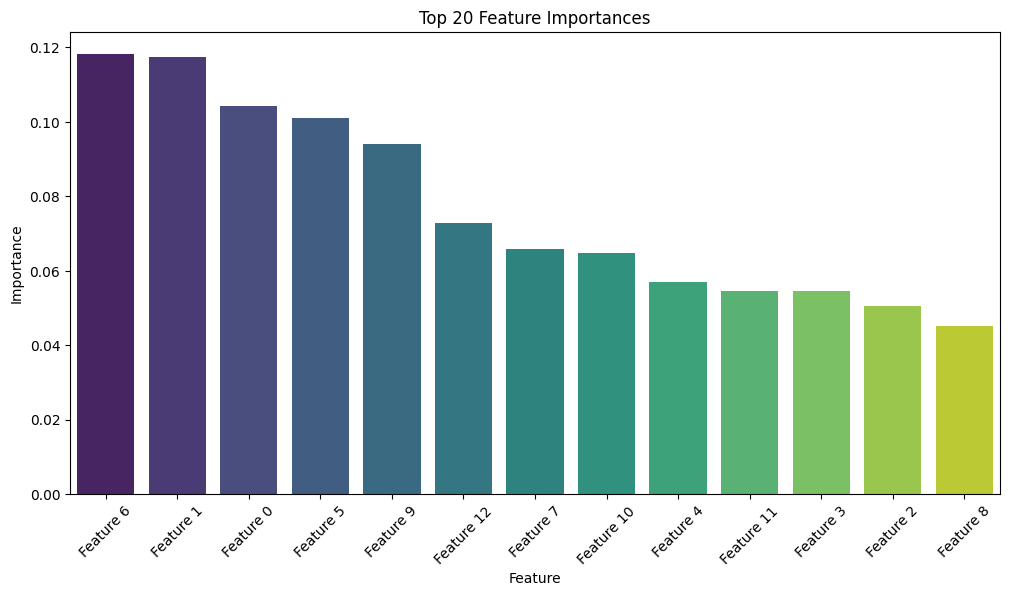

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# If X_train was originally a DataFrame, get feature names from the original DataFrame
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Get feature importances
feature_importances = clf.feature_importances_

# Sort indices based on importance
indices = np.argsort(feature_importances)[::-1]

# Plot top 20 important features
plt.figure(figsize=(12, 6))
sns.barplot(x=np.array(feature_names)[indices][:20], y=feature_importances[indices][:20], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 20 Feature Importances")
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features per split
    'bootstrap': [True, False]  # Whether to use bootstrapping
}

# Initialize RandomForest
rf = RandomForestClassifier(random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Accuracy: 0.9778169667718581
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5371
           1       0.98      0.97      0.98      5403

    accuracy                           0.98     10774
   macro avg       0.98      0.98      0.98     10774
weighted avg       0.98      0.98      0.98     10774



In [12]:
import joblib

# Save the best model
joblib.dump(best_rf, 'random_forest_tuned.pkl')
print("Model saved as random_forest_tuned.pkl")


Model saved as random_forest_tuned.pkl


In [13]:
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

# Define the base models
rf_model = best_rf  # Your tuned Random Forest
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define stacking classifier
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)], final_estimator=RandomForestClassifier(n_estimators=100)
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacked model
stacking_accuracy = stacking_model.score(X_test, y_test)
print("Stacking Model Accuracy:", stacking_accuracy)


Stacking Model Accuracy: 0.978188230926304


In [14]:
import joblib

# Save the model
joblib.dump(stacking_model, 'stacked_model.pkl')
print("Model saved as stacked_model.pkl")


Model saved as stacked_model.pkl


In [18]:
%tb  # Shows the full traceback


In [19]:
!pip show flask


Name: Flask
Version: 3.1.0
Summary: A simple framework for building complex web applications.
Home-page: 
Author: 
Author-email: 
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: blinker, click, itsdangerous, Jinja2, Werkzeug
Required-by: community, kaggle-environments
